In [1]:
# ✅ 한글 폰트 설치 (NanumGothic)
!apt-get update -qq
!apt-get install -y fonts-nanum

# ✅ matplotlib 폰트 캐시 삭제
import os
os.system('rm -rf ~/.cache/matplotlib')

print("✅ 폰트 설치 완료! 이제 런타임 > 다시 시작(ctrl+M+.) 을 꼭 해주세요.")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (65.0 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126281 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
✅ 폰트 설치 완료! 이제 런타임 > 다시 시작(ctrl+M+

In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'NanumGothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

#저장라이브러리
import pickle

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# 데이터를 학습용과 검증용으로 나눈다.
from sklearn.model_selection import train_test_split

import os


# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층구조를 정의하는 것
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation
# Convolutional Layer
# 합성곱을 수행하는 레이어
# Convolutionla Layer 를 사용하는 신경망을 CNN이라고 부른다.
# 커널에 설정되어 있는 가중치 값에 따라서 특정 부분의 값을 낮추고 특정 부분의 값을 키워서
# 특성이 잘 드러나게 하는 역할을 수행한다.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
# MaxPooling
# Convolutional Layer를 통과한 데이터에서 큰 부분만 취하는 역할을 수행한다.
# 필요한 특성을 나타내는 부분을 취하고 나머지는 버리는 효과를 얻게 된다.
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D
# 다차원의 데이터를 1차원 데이터로 변환시켜준다.
# 선형회귀 레이어로 가기전에 두어야 한다.
from tensorflow.keras.layers import Flatten
# Dropout : 데이터 하나가 들어오면 레이어의 모든 노드가 그 데이터를 학습하게 된다.
# 그렇기 때문에 모든 가중치 값이 데이터에 영향을 받아서 변경된다.
# 만약 각 노드들이 특정 패턴의 데이터만 학습하고자 한다면 학습시 일부 노드들을 비활성화 시켜서
# 학습에 참여시키지 않게 할 수 있다.
# 전체 데이터에 대해 모든 노드들이 과접합을 되는 것을 예방한다.
from tensorflow.keras.layers import Dropout
# Embedding : 주어진 단어 데이터를 통해 단어 벡터를 생성하는 레이어
# 생성한 벡터 공간의 차원을 매개변수로 받는다.
# 주어진 문장 데이터의 단어 개수가 공간의 차원을 넘어서면 출현 빈도수가 높은 단어들로만
# 구성하여 공간 벡터를 구성한다.
from tensorflow.keras.layers import Embedding
# LSTM : RNN 용 Layer
# 이전에 입력된 데이터와 함께 묶어서 학습할 데이터를 생성하는 방식으로 동작하는 레이어
# 순환신경망. 문장 데이터, 주식시세, 시계열 데이터 등의 데이터 패턴을 보고 다음 데이터를
# 예측하는데 사용한다.
# LSTM은 Long Term Memory와 Short Term Memory를 두어 데이터의 패턴이 좀더 다양하게 생성될 수
# 있도록 하는 특징을 가지고 있다.
from tensorflow.keras.layers import LSTM

# GAN
# GAN에서 사용하는 활성화 함수
from tensorflow.keras.layers import LeakyReLU
# 레이어를 통과한 데이터를 다시 표준화하여 학습 효율성을 높히게 한다.
from tensorflow.keras.layers import BatchNormalization
# 레이어를 통과한 데이터의 차원을 변경하기위 사용한다.
from tensorflow.keras.layers import Reshape
# 데이터 업샘플링 - Convolutional Layer가 데이터의 크기를 줄이므로 늘리는 것이 필요하다
from tensorflow.keras.layers import UpSampling2D
# 입력층
from tensorflow.keras.layers import Input
# 딥러닝 모델, GAN은 생성자 신경망과 판별자 신경망을 같이 써야 하기 때문에
# 이 둘을 하나의 신경망으로 합치기 위해 사용한다.
from tensorflow.keras.models import Model


# 다중 분류를 위한 원핫 인코딩
from tensorflow.keras.utils import to_categorical

# 저장된 학습 모델 복원
from tensorflow.keras.models import load_model

# epoch마다 모델을 저장하는 함수
from tensorflow.keras.callbacks import ModelCheckpoint
# 조기 중단
from tensorflow.keras.callbacks import EarlyStopping

# 경사하강법
from tensorflow.keras.optimizers import Adam

# 문자열을 잘라낸다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장 데이터의 단어 데이터 수를 동일하게 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 단어 사전으로 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# 전이 학습을 위한 사전 학습 모델
from tensorflow.keras.applications import VGG16

# 이미지 데이터를 불러올 때 나눠서 읽어오거나 읽어올때 이미지 데이터를 가공하면서
# 가져울 수 있는 도구
# 이미지가 들어있는 폴더이름이 결과데이터가 됨(그렇기때문에 폴더를 잘 구성해주어야 함)
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.applications import ResNet152

# 출력한 것을 청소하는 함수
from IPython.display import clear_output
# 시간 관련
import time

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

In [3]:
all_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/병합_selected_features.csv')
all_df

,ID,Segment,이용금액_오프라인_R3M,이용금액대_ord,정상청구원금_B2M,이용금액_R3M_신용체크,연속유실적개월수_기본_24M_카드,미이용_CA,정상청구원금_B0M,최대이용금액_체크_R12M,...,RP후경과월_전기,이용금액_카드론_R12M,이용건수_체크_R6M,RV_평균잔액_R12M,이용개월수_할부_유이자_R6M,_3순위쇼핑업종_이용금액,잔액_할부_유이자_B0M,잔액_현금서비스_B2M,이용가능여부_해외겸용_본인,RV_최대잔액_R12M
0,TRAIN_000000,D,11756,6,15251,-454,17,0,15067,998,...,6,0,0,0,0,0,0,30640,0,0
1,TRAIN_000001,E,12128,5,2776,7089,17,0,2222,0,...,6,0,0,0,0,517,1491,0,0,0
2,TRAIN_000002,C,24370,6,23325,27336,8,0,26184,0,...,6,0,0,1255,0,1172,0,27654,1,4587
3,TRAIN_000003,D,12529,6,18808,4270,24,0,20959,0,...,6,0,0,0,4,682,2092,28938,1,0
4,TRAIN_000004,E,0,2,0,9385,0,1,639,3910,...,6,0,55,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,TRAIN_399995,E,0,1,0,10755,0,1,19,5072,...,6,0,76,0,0,0,0,0,1,0
399996,TRAIN_399996,D,25205,6,14844,27636,17,1,13462,0,...,6,0,0,0,0,346,0,0,1,0
399997,TRAIN_399997,C,13267,3,6862,23187,24,1,7049,0,...,6,0,0,0,0,305,0,0,1,0
399998,TRAIN_399998,E,0,1,0,0,0,1,0,0,...,6,0,0,0,0,0,0,0,0,0


## 0의 비율이 5% 이상 95%이하 컬럼 선별

In [5]:
# 분석에서 제외할 컬럼 리스트
exclude_cols = ['ID', 'Segment', '기준년월']

# 0 vs 비0 플래그 대상으로 사용할 수치형 컬럼 리스트
num_cols = [
    col for col in all_df.select_dtypes(include='number').columns
    if col not in exclude_cols
]

# 비0 비율 계산 후, 5% 이상 95% 이하인 컬럼만 선별
ratio = {col: (all_df[col] != 0).mean() * 100 for col in num_cols}
valid_cols = [col for col, pct in ratio.items() if 5 <= pct <= 95]

# 유효 컬럼 목록 출력
display(pd.DataFrame({'비0 비율(%)': [ratio[c] for c in valid_cols]}, index=valid_cols))

# 유효 컬럼들에 대해 EDA 수행
for orig_col in valid_cols:
    # 비0 플래그 생성
    flag_col = f'{orig_col}_flag'
    all_df[flag_col] = (all_df[orig_col] != 0).astype(int)

    # 비0 비율 계산 및 출력
    pct_nonzero = ratio[orig_col]
    display(pd.DataFrame({'비0 비율(%)': [pct_nonzero]}, index=[orig_col]))

    # 비0 그룹 통계 요약 출력
    group_stats = all_df[all_df[flag_col] == 1][orig_col].agg(
        ['count', 'mean', 'median', 'std', 'min', 'max']
    )
    display(group_stats.to_frame(name=f'{orig_col} 비0 그룹 통계'))

    # 세그먼트별 비0 비율 교차표 출력
    cross_tab = pd.crosstab(all_df['Segment'], all_df[flag_col], normalize='index') * 100
    display(cross_tab[1].to_frame(name=f'{orig_col} 비0 비율(%)'))

    # 비0 값 히스토그램 시각화
    non_zero_values = all_df.loc[all_df[flag_col] == 1, orig_col]
    plt.figure(figsize=(6,3))
    plt.hist(non_zero_values, bins=30)
    plt.title(f'{orig_col} 비0 히스토그램')
    plt.xlabel(orig_col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

### 전처리 후 VIF 10이상인 컬럼 제외한 데이터 파일과 전처리 파일의 컬럼을 비교하여 청구/잔액 관련 컬럼찾기

In [9]:
select_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/최종데이터/청구잔액전처리_최종데이터.csv')
all_selected_features = select_df.columns.to_list()

In [10]:
# 일치하는 컬럼
matched = [col for col in all_selected_features if col in all_df.columns]

# 누락된 컬럼
missing = [col for col in all_selected_features if col not in all_df.columns]

# 결과 출력
print(f"일치하는 컬럼 수: {len(matched)}")
print(f"누락된 컬럼 수: {len(missing)}")

# 일치하는 컬럼 목록 확인
print("\n일치하는 컬럼명:")
for col in matched:
    print("-", col)

일치하는 컬럼 수: 21
누락된 컬럼 수: 89

일치하는 컬럼명:
- ID
- 청구금액_R3M
- 포인트_포인트_월적립_R3M
- 포인트_적립포인트_R3M
- 마일_적립포인트_R12M
- 할인금액_B0M
- 할인금액_청구서_R3M
- Segment
- 잔액_현금서비스_B2M
- 잔액_카드론_B2M
- 잔액_카드론_B4M
- 잔액_카드론_B5M
- RV_평균잔액_R12M
- RV_최대잔액_R12M
- RV_최대잔액_R3M
- 잔액_할부_유이자_B0M
- 월중평잔_RV일시불
- 평잔_CA_3M
- 평잔_카드론_3M
- 평잔_일시불_6M
- 평잔_카드론_6M


In [23]:
check_df = all_df[matched]
check_df

,ID,청구금액_R3M,포인트_포인트_월적립_R3M,포인트_적립포인트_R3M,마일_적립포인트_R12M,할인금액_B0M,할인금액_청구서_R3M,Segment,잔액_현금서비스_B2M,잔액_카드론_B2M,...,잔액_카드론_B5M,RV_평균잔액_R12M,RV_최대잔액_R12M,RV_최대잔액_R3M,잔액_할부_유이자_B0M,월중평잔_RV일시불,평잔_CA_3M,평잔_카드론_3M,평잔_일시불_6M,평잔_카드론_6M
0,TRAIN_000000,42163,0,1514,0,0,0,D,30640,0,...,0,0,0,0,0,0,25849,0,2337,0
1,TRAIN_000001,8539,0,0,0,0,490,E,0,0,...,0,0,0,0,1491,2370,0,0,2865,0
2,TRAIN_000002,84250,0,4730,0,0,0,C,27654,0,...,0,1255,4587,6104,0,7371,50796,0,7522,0
3,TRAIN_000003,72964,0,4208,0,0,0,D,28938,0,...,0,0,0,0,2092,0,22068,0,2205,0
4,TRAIN_000004,0,0,0,0,0,0,E,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,TRAIN_399995,0,0,0,0,0,0,E,0,0,...,0,0,0,0,0,0,0,0,0,0
399996,TRAIN_399996,37515,0,8478,0,0,162,D,0,25886,...,30591,0,0,0,0,0,0,16942,12524,23031
399997,TRAIN_399997,22274,0,0,0,0,0,C,0,0,...,0,0,0,0,0,0,0,0,3241,0
399998,TRAIN_399998,0,0,0,0,0,0,E,0,0,...,0,0,0,0,0,0,0,0,0,0


,비0 비율(%)
청구금액_R3M,77.48300
포인트_적립포인트_R3M,17.34350
할인금액_B0M,24.09525
할인금액_청구서_R3M,32.01025
잔액_카드론_B2M,6.03450
잔액_카드론_B4M,6.22825
잔액_카드론_B5M,6.27425
RV_평균잔액_R12M,6.29750
RV_최대잔액_R12M,6.29775
잔액_할부_유이자_B0M,16.24675


,비0 비율(%)
청구금액_R3M,77.483


,청구금액_R3M 비0 그룹 통계
count,309932.000000
mean,19512.261403
median,12074.000000
std,24480.494578
min,10.000000
max,499057.000000


,청구금액_R3M 비0 비율(%)
Segment,
A,100.000000
B,100.000000
C,97.244298
D,95.641418
E,72.858695


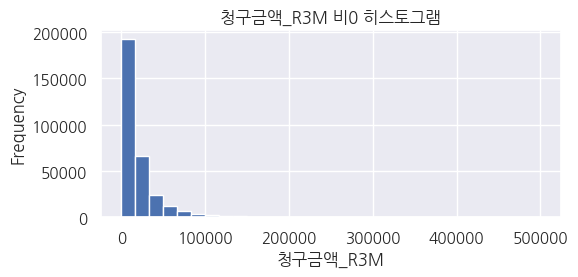

,비0 비율(%)
포인트_적립포인트_R3M,17.3435


,포인트_적립포인트_R3M 비0 그룹 통계
count,69374.000000
mean,7279.034004
median,5565.500000
std,6525.007640
min,-184.000000
max,69561.000000


,포인트_적립포인트_R3M 비0 비율(%)
Segment,
A,29.629630
B,50.000000
C,31.850458
D,28.649475
E,14.317511


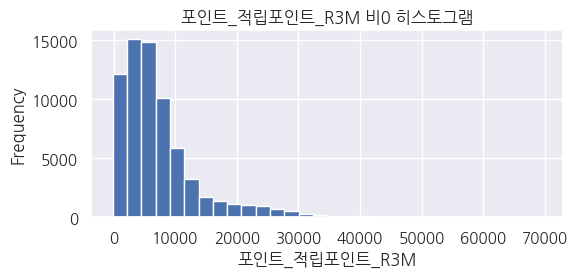

,비0 비율(%)
할인금액_B0M,24.09525


,할인금액_B0M 비0 그룹 통계
count,96381.000000
mean,108.991502
median,113.000000
std,84.187929
min,2.000000
max,437.000000


,할인금액_B0M 비0 비율(%)
Segment,
A,14.197531
B,29.166667
C,32.395956
D,33.276066
E,21.880678


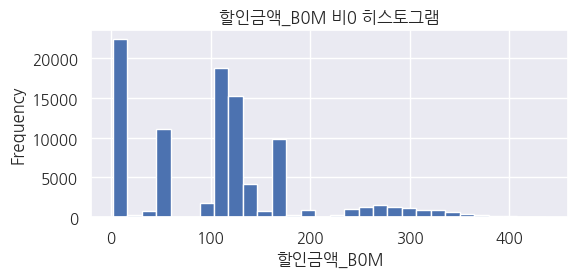

,비0 비율(%)
할인금액_청구서_R3M,32.01025


,할인금액_청구서_R3M 비0 그룹 통계
count,128041.000000
mean,385.348677
median,452.000000
std,309.255894
min,2.000000
max,1779.000000


,할인금액_청구서_R3M 비0 비율(%)
Segment,
A,22.839506
B,41.666667
C,43.136609
D,43.412304
E,29.203788


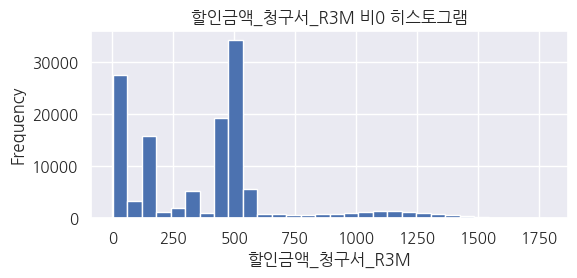

,비0 비율(%)
잔액_카드론_B2M,6.0345


,잔액_카드론_B2M 비0 그룹 통계
count,24138.000000
mean,41973.506131
median,31996.500000
std,31341.481614
min,5360.000000
max,244906.000000


,잔액_카드론_B2M 비0 비율(%)
Segment,
A,8.024691
B,8.333333
C,9.988244
D,9.380315
E,5.162920


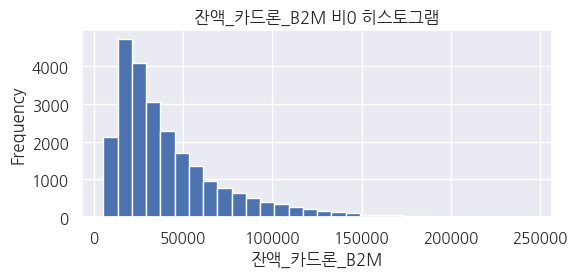

,비0 비율(%)
잔액_카드론_B4M,6.22825


,잔액_카드론_B4M 비0 그룹 통계
count,24913.000000
mean,42465.907719
median,33010.000000
std,30861.835372
min,5670.000000
max,244906.000000


,잔액_카드론_B4M 비0 비율(%)
Segment,
A,7.407407
B,8.333333
C,10.557254
D,9.766867
E,5.297151


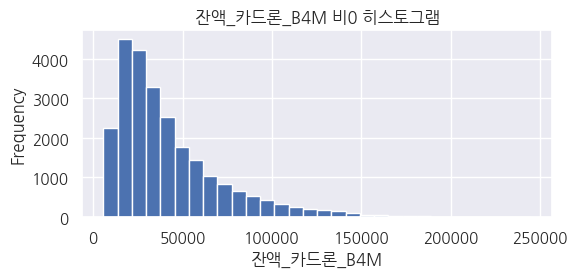

,비0 비율(%)
잔액_카드론_B5M,6.27425


,잔액_카드론_B5M 비0 그룹 통계
count,25097.000000
mean,42758.678049
median,33609.000000
std,30499.092925
min,5159.000000
max,233904.000000


,잔액_카드론_B5M 비0 비율(%)
Segment,
A,8.024691
B,8.333333
C,10.693628
D,9.854485
E,5.329304


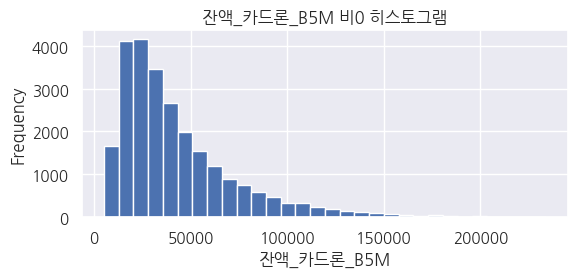

,비0 비율(%)
RV_평균잔액_R12M,6.2975


,RV_평균잔액_R12M 비0 그룹 통계
count,25190.000000
mean,7333.697856
median,768.000000
std,11201.019635
min,111.000000
max,94779.000000


,RV_평균잔액_R12M 비0 비율(%)
Segment,
A,8.024691
B,8.333333
C,9.673172
D,10.895597
E,5.236903


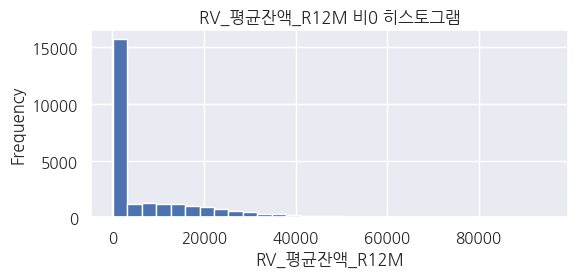

,비0 비율(%)
RV_최대잔액_R12M,6.29775


,RV_최대잔액_R12M 비0 그룹 통계
count,25191.000000
mean,11712.020404
median,3921.000000
std,12972.385447
min,1054.000000
max,89512.000000


,RV_최대잔액_R12M 비0 비율(%)
Segment,
A,8.024691
B,8.333333
C,9.677874
D,10.899033
E,5.236279


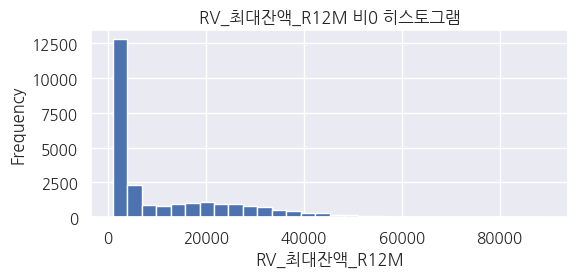

,비0 비율(%)
잔액_할부_유이자_B0M,16.24675


,잔액_할부_유이자_B0M 비0 그룹 통계
count,64987.000000
mean,3137.859341
median,2475.000000
std,2123.997654
min,685.000000
max,28160.000000


,잔액_할부_유이자_B0M 비0 비율(%)
Segment,
A,12.345679
B,12.500000
C,23.884317
D,24.909375
E,14.167983


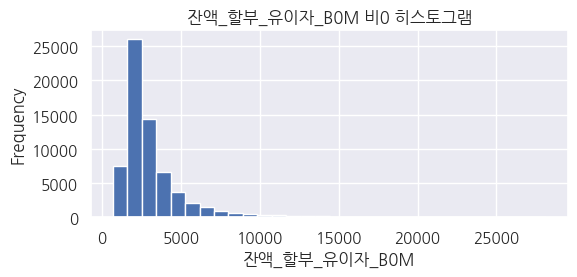

,비0 비율(%)
월중평잔_RV일시불,15.80475


,월중평잔_RV일시불 비0 그룹 통계
count,63219.000000
mean,6102.387621
median,2794.000000
std,10071.254308
min,152.000000
max,136073.000000


,월중평잔_RV일시불 비0 비율(%)
Segment,
A,18.518519
B,33.333333
C,21.871620
D,25.082894
E,13.713469


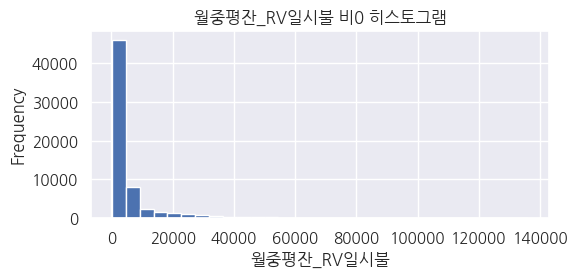

,비0 비율(%)
평잔_CA_3M,8.0285


,평잔_CA_3M 비0 그룹 통계
count,32114.000000
mean,11291.316248
median,4912.000000
std,14726.415598
min,474.000000
max,141304.000000


,평잔_CA_3M 비0 비율(%)
Segment,
A,29.629630
B,50.000000
C,24.495650
D,16.228289
E,5.431383


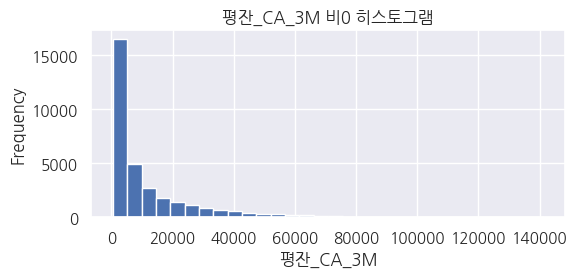

,비0 비율(%)
평잔_카드론_3M,6.4865


,평잔_카드론_3M 비0 그룹 통계
count,25946.000000
mean,40951.240962
median,27103.500000
std,40200.034249
min,1888.000000
max,230000.000000


,평잔_카드론_3M 비0 비율(%)
Segment,
A,8.641975
B,12.500000
C,10.952269
D,10.105314
E,5.530964


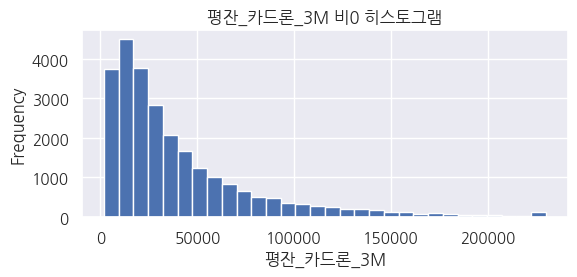

,비0 비율(%)
평잔_일시불_6M,79.0305


,평잔_일시불_6M 비0 그룹 통계
count,316122.000000
mean,5624.235846
median,2976.000000
std,8450.060143
min,2.000000
max,176861.000000


,평잔_일시불_6M 비0 비율(%)
Segment,
A,100.000000
B,100.000000
C,96.741124
D,95.648290
E,74.823158


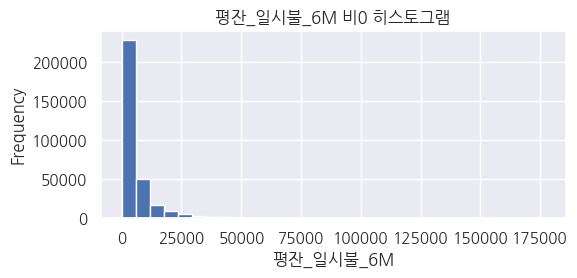

,비0 비율(%)
평잔_카드론_6M,7.0855


,평잔_카드론_6M 비0 그룹 통계
count,28342.000000
mean,43863.456602
median,28419.500000
std,43696.634841
min,1488.000000
max,225000.000000


,평잔_카드론_6M 비0 비율(%)
Segment,
A,9.259259
B,16.666667
C,12.170233
D,11.125810
E,6.012012


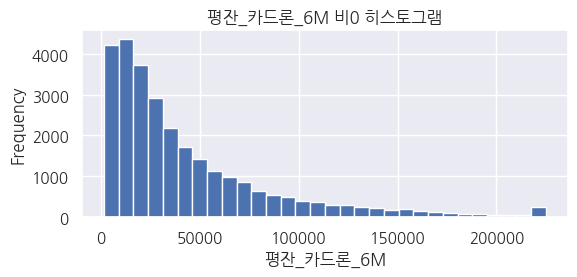

In [24]:
# 분석에서 제외할 컬럼 리스트
exclude_cols = ['ID', 'Segment', '기준년월']

# 0 vs 비0 플래그 대상으로 사용할 수치형 컬럼 리스트
num_cols = [
    col for col in check_df.select_dtypes(include='number').columns
    if col not in exclude_cols
]

# 비0 비율 계산 후, 5% 이상 95% 이하인 컬럼만 선별
ratio = {col: (check_df[col] != 0).mean() * 100 for col in num_cols}
valid_cols = [col for col, pct in ratio.items() if 5 <= pct <= 95]

# 유효 컬럼 목록 출력
display(pd.DataFrame({'비0 비율(%)': [ratio[c] for c in valid_cols]}, index=valid_cols))

# 유효 컬럼들에 대해 EDA 수행
for orig_col in valid_cols:
    # 비0 플래그 생성
    flag_col = f'{orig_col}_flag'
    check_df[flag_col] = (check_df[orig_col] != 0).astype(int)

    # 비0 비율 계산 및 출력
    pct_nonzero = ratio[orig_col]
    display(pd.DataFrame({'비0 비율(%)': [pct_nonzero]}, index=[orig_col]))

    # 비0 그룹 통계 요약 출력
    group_stats = check_df[check_df[flag_col] == 1][orig_col].agg(
        ['count', 'mean', 'median', 'std', 'min', 'max']
    )
    display(group_stats.to_frame(name=f'{orig_col} 비0 그룹 통계'))

    # 세그먼트별 비0 비율 교차표 출력
    cross_tab = pd.crosstab(check_df['Segment'], check_df[flag_col], normalize='index') * 100
    display(cross_tab[1].to_frame(name=f'{orig_col} 비0 비율(%)'))

    # 비0 값 히스토그램 시각화
    non_zero_values = all_df.loc[check_df[flag_col] == 1, orig_col]
    plt.figure(figsize=(6,3))
    plt.hist(non_zero_values, bins=30)
    plt.title(f'{orig_col} 비0 히스토그램')
    plt.xlabel(orig_col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### 각 컬럼별 EDA 작업

In [81]:
# PPT 템플릿 색상 (진한 파랑 → 연한 파랑 순)
colors = {
    'navy_blue_1': '#001F6F',   # 아주 진한 남색
    # 'navy_blue_2': '#002060',   # 진한 파랑
    'navy_blue_3': '#0033B4',   # 중간 진한 파랑
    'navy_blue_4': '#0037C3',   # 중간 파랑
    'bright_blue_1': '#0048FF', # 밝은 파랑
    # 'bright_blue_2': '#0070C0', # 선명한 파랑
    # 'sky_blue_1': '#2E69FF',    # 연한 블루 계열
    'sky_blue_2': '#A9D0F5',    # 가장 연한 하늘색
}

In [82]:
# 비0 플래그
check_df['청구금액_R3M_flag'] = (check_df['청구금액_R3M'] != 0).astype(int)

# 세그먼트 분포 비교
flag_dist = pd.crosstab(check_df['청구금액_R3M_flag'], check_df['Segment'], normalize='index') * 100
display(flag_dist)

Segment,A,B,C,D,E
청구금액_R3M_flag,,,,,
0,0.00000,0.000000,0.650620,2.816761,96.532620
1,0.05227,0.007744,6.672109,17.962005,75.305874


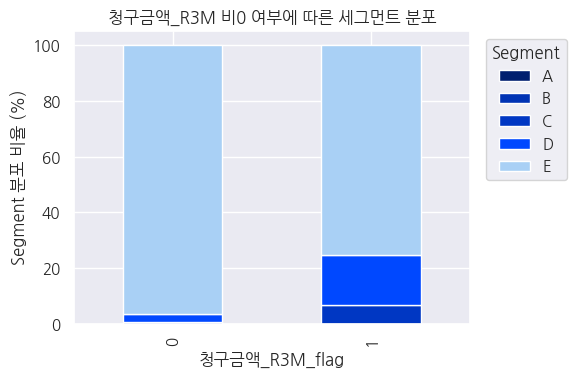

In [83]:
# 예시: segment_order와 색상 딕셔너리 정의
segment_order = ['A', 'B', 'C', 'D', 'E']

# 세그먼트에 대응하는 색상 매핑 (segment_order와 색상 순서 맞춤)
color_dict = dict(zip(segment_order, list(colors.values())))

# 청구금액_R3M 비0 여부 플래그
check_df['청구금액_R3M_flag'] = (check_df['청구금액_R3M'] != 0).astype(int)

# 세그먼트 분포 계산 (flag 기준)
flag_dist = pd.crosstab(check_df['Segment'], check_df['청구금액_R3M_flag'], normalize='columns') * 100

# 시각화를 위한 전치 및 정렬
flag_dist_T = flag_dist.T.loc[:, segment_order]

# 그래프 시각화
ax = flag_dist_T.plot(kind='bar', stacked=True,
                      color=[color_dict[seg] for seg in flag_dist_T.columns],
                      figsize=(6, 4))
plt.title('청구금액_R3M 비0 여부에 따른 세그먼트 분포')
plt.ylabel('Segment 분포 비율 (%)')
plt.xlabel('청구금액_R3M_flag')
plt.legend(title='Segment', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


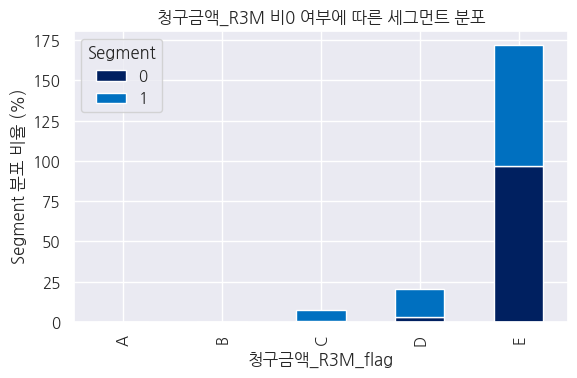

In [78]:
segment_order = ['A', 'B', 'C', 'D', 'E']
color_dict = {'A': '#002060', 'B': '#0070C0', 'C': '#A9D0F5', 'D': '#6CA6CD', 'E': '#B0C4DE'}

flag_dist_T = flag_dist.T.loc[segment_order]

ax = flag_dist_T.plot(kind='bar', stacked=True,
                      color=[color_dict[seg] for seg in flag_dist_T.index],
                      figsize=(6,4))
plt.title('청구금액_R3M 비0 여부에 따른 세그먼트 분포')
plt.ylabel('Segment 분포 비율 (%)')
plt.xlabel('청구금액_R3M_flag')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()


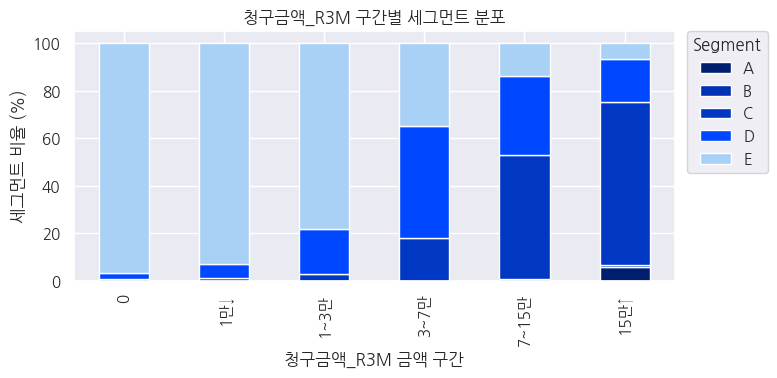

In [77]:
# 금액을 구간(bin)으로 나눔
check_df['청구금액_R3M_bin'] = pd.cut(check_df['청구금액_R3M'],
    bins=[-1, 0, 10000, 30000, 70000, 150000, np.inf],
    labels=['0', '1만↓', '1~3만', '3~7만', '7~15만', '15만↑']
)

# 구간별 세그먼트 비율
bin_dist = pd.crosstab(check_df['청구금액_R3M_bin'], check_df['Segment'], normalize='index') * 100

bin_dist.plot(kind='bar', stacked=True,
              color=colors.values(),
              figsize=(8, 4))
plt.title('청구금액_R3M 구간별 세그먼트 분포')
plt.ylabel('세그먼트 비율 (%)')
plt.xlabel('청구금액_R3M 금액 구간')
plt.legend(title='Segment', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()


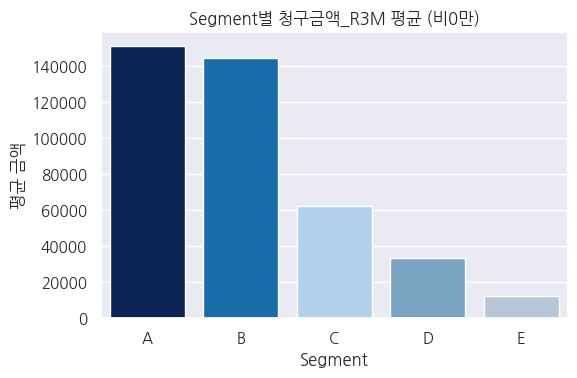

In [76]:
nonzero_df = check_df[check_df['청구금액_R3M'] != 0]

seg_amount_avg = nonzero_df.groupby('Segment')['청구금액_R3M'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=seg_amount_avg.index, y=seg_amount_avg.values,
            palette=['#002060', '#0070C0', '#A9D0F5', '#6CA6CD', '#B0C4DE'])
plt.title('Segment별 청구금액_R3M 평균 (비0만)')
plt.ylabel('평균 금액')
plt.tight_layout()
plt.show()


청구금액_R3M 금액 구간별로 세그먼트 분포를 비교한 결과,
청구금액이 0인 고객의 대부분은 Segment E에 속한다.

반면, 청구금액이 3만 원 이상인 구간부터는 Segment C, D의 비중이 눈에 띄게 증가하고,금액이 커질수록 Segment A, B까지 분포가 확장되는 양상을 보인다.

특히 15만 원 이상 고금액 구간에서는 E가 거의 존재하지 않으며,
이는 청구금액_R3M이 고객 세그먼트 분류에 있어 매우 강력한 구분 기준이 됨을 시사한다.